# Graded Lab Assignment: Logistic Regression

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignmnet are distributed as follows:
* The implementation
    - prediction_function
    - cost_function
    - compute_gradient
    - correct stop condition
    - preventing overfitting
    - systematically choosing learning rate 
    - 
    

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


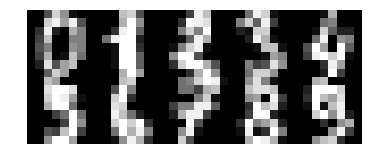

In [3]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print ("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Make sure to comment your code!

In [39]:
#Make a prediction function h
def prediction_function(x,theta):
    z = dot(theta.T,x) 
    x_predict = 1 / (1 + exp(- z))
    return x_predict 

In [40]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    #minimize the sum of squared errors
    #use logistic regression and use the number of rows in x_predict for m
    m = x.shape[0]
    J =  (-1/m)*(dot(y,log(x_predict))+dot((1-y),log(1-x_predict)))
    return J

In [41]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    m = x.shape[0]
    gradient = (1/m)*dot(x.T, (x_predict - y))
    return gradient

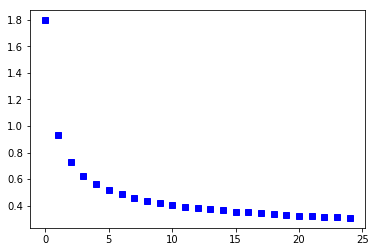

In [42]:
#learning rate
alpha = 0.0001 #various 0.000001 < a < 0.01 were tested, this was chosen as the largest, accurate alpha
iterations = 25#enough for a reduced cost (see bottom explanation)
theta = np.zeros((64,10)) #(nr of pixels, nr of digits)

x = np.reshape(digits.images[:1500],(1500,64)) #training set
x_test = np.reshape(digits.images[1500:],(297,64)) #test set

target = digits.target[:1500] #training target
target_test = digits.target[1500:] #test target

#TRAINING ITERATIONS
m = x.shape[0] #number of digits in training set
cost = np.zeros(iterations) #calculates cost reduce per iteration

for i in range(iterations): #for every iteration
    temp_cost = 0 #initial value for loop
    for j in range(m): #for every digit in training set
        
        #hypothesis function
        xj = reshape(x[j,:],(1,len(x[j,:]))) #reshapes the digit data to (1,64)
        x_predict = prediction_function(xj.T,theta) #predicts possability of digits for xj

        #y
        y = np.zeros(10) #initiate
        y[target[j]] = 1 
                
        #cost function
        temp_cost += cost_function(x_predict,y) #sums up and calculates cost for all digit data
        
        #gradient descent step
        gradient = compute_gradient(x_predict.T, reshape(y,(1,10)), xj) #calculates theta
        theta = theta - alpha * gradient #updates theta according to stepsize
#cost     
    cost[i] = temp_cost
plt.plot(list(range(iterations)),cost,'bs') #plot cost progress

#As can be seen in the plotted function, the cost function decreases rapidly and becomes, 
#reasonably constant at 25 iterations. Therefore, this number was used as a stopcondition, 
#rather than a threshold with a while loop. 
#This threshold could be a certain value, reached when the difference of 2 consecutive temp_cost.




In [43]:
#TEST ITERATIONS

#initialize arrays with digit codes
codex = np.zeros(len(x_test)) 
codey = np.zeros(len(x_test)) 

for j in range(len(x_test)):
    #hypothesis
    x_testj = reshape(x_test[j,:],(1,len(x_test[j,:]))) #reshapes the digit data
    x_testpredict = prediction_function(x_testj.T,theta) #predicts possability of digits for x_testj

    #y
    y = np.zeros(10) #initiate y
    y[target_test[j]] = 1 
    
    #determine digits
    x_digit = argmax(x_testpredict) #determine which digit has the highest estimated probability
    y_digit = argmax(y) #determine the digit in the original code 
    codex[j] = x_digit #fills in the estimated digit in the approximated code
    codey[j] = y_digit #creates an array with the original code
    
    correct = np.sum(codex == codey) #calculates amount of correctly estimated code

print ("The percentage of correctly estmated numbers is", (correct / len(x_test))*100, "percent")    
print ("The numbers determined are: \n", codex)
print ("The numbers actually are: \n", codey)

#The highest percentage of correctly estimated digits in the code was 88.88 percent. 
#Changing the current alpha reduced this number.


The percentage of correctly estmated numbers is 88.8888888889 percent
The numbers determined are: 
 [ 1.  7.  4.  6.  3.  1.  3.  9.  1.  7.  6.  8.  4.  3.  1.  4.  0.  5.
  3.  6.  9.  6.  1.  7.  5.  4.  4.  7.  2.  8.  2.  2.  5.  7.  9.  5.
  4.  8.  8.  4.  0.  0.  8.  9.  8.  0.  1.  2.  3.  4.  5.  1.  8.  1.
  9.  0.  1.  2.  3.  4.  5.  6.  7.  0.  1.  2.  3.  4.  5.  1.  7.  1.
  9.  4.  9.  5.  5.  6.  5.  0.  8.  8.  1.  8.  4.  1.  7.  7.  1.  5.
  1.  0.  0.  2.  2.  4.  8.  2.  0.  1.  2.  6.  1.  7.  7.  7.  8.  4.
  6.  6.  6.  8.  9.  1.  5.  0.  9.  5.  2.  8.  0.  1.  7.  6.  3.  2.
  1.  7.  8.  6.  3.  1.  3.  8.  1.  7.  6.  8.  4.  3.  1.  4.  0.  5.
  3.  6.  9.  6.  1.  7.  5.  4.  4.  7.  2.  2.  5.  7.  3.  5.  8.  4.
  1.  0.  8.  8.  8.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.  0.  1.  2.
  8.  4.  5.  6.  7.  8.  9.  0.  1.  2.  1.  4.  5.  6.  7.  8.  9.  0.
  9.  5.  5.  6.  5.  0.  9.  8.  9.  8.  4.  1.  7.  7.  7.  5.  1.  0.
  0.  2.  2.  7.  8.  2.

In [ ]:
#UNDER- AND OVERFITTING

#Overfitting occurs when a learning algorithm matches the training set to accurately. 
#Causing the algorithm performance problems when classifying the testing data set.
#Underfitting occurs when the algorithm cannot clasify the training data and 
#therefor also not the new testing data or generalize the model in general.

#It is important to avoid both these problems, that one finds a nice balance between 
#training the data set and generalizing it. 
#It's important to test the difference in alpha values and number of iteration.
#In addition it is helpful to have a large training data set, 
#to avoid the theta's to become to specific to the training set.